Name : Munasighe M.M.R.H.

Index Number : 190399L

In [2]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 

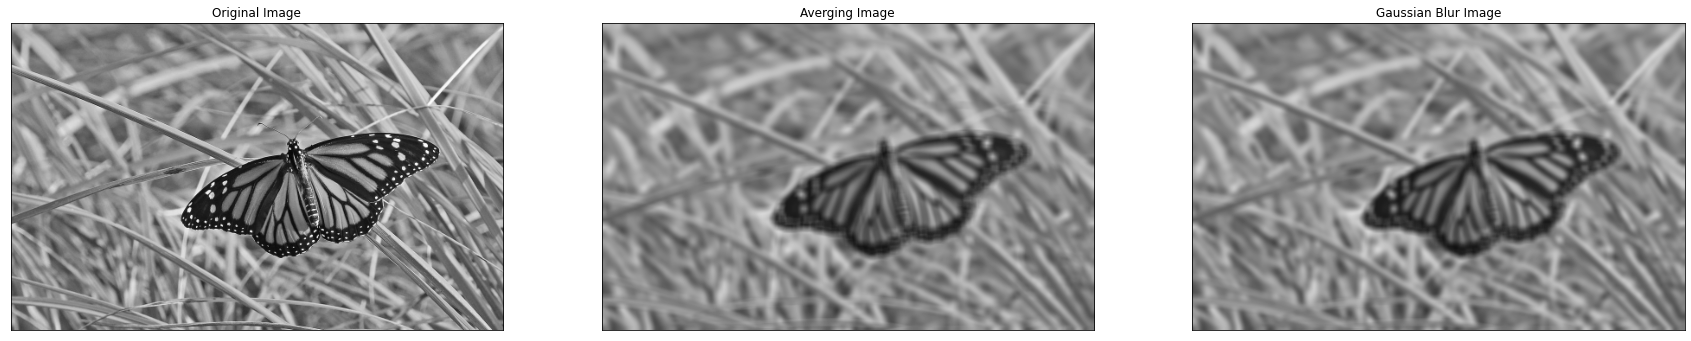

In [50]:
img1 = cv.imread(r"butterfly.jpg", cv.IMREAD_REDUCED_GRAYSCALE_2).astype('float32')
assert img1 is not None

avg_kernal = np.ones((9,9), np.float32)/81
fil_img1 = cv.filter2D(img1, -1, avg_kernal)

sigma = 4
k_size = 9
blurred_img1 = cv.GaussianBlur(img1, (k_size,k_size), sigma)

fig, ax = plt.subplots(1,3, sharex='all', figsize=(30,30))
ax[0].imshow(img1, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Original Image')
ax[0].set_xticks([]), ax[0].set_yticks([])

ax[1].imshow(fil_img1, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Averging Image')
ax[1].set_xticks([]), ax[1].set_yticks([])

ax[2].imshow(blurred_img1, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Gaussian Blur Image')
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

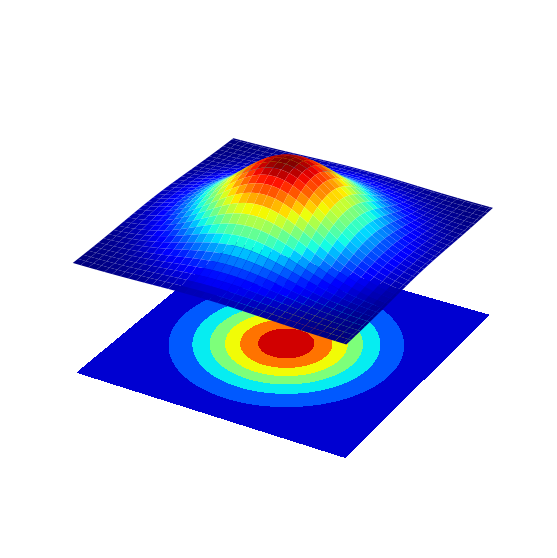

In [74]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

sigma = 2
X_ = np.arange(-5, 5.1, .1)
Y_ = np.arange(-5, 5.1, .1)
X, Y = np.meshgrid(X_,Y_)
Z = np.exp(-(X**2 + Y**2)/(2*sigma**2))

surf = ax.plot_surface(X, Y, Z, cmap=cm.jet, linewidth=0, antialiased=True)
cset = ax.contourf(X, Y, Z, zdir='z', offset=np.min(Z) - 1.5, cmap=cm.jet)
ax.set_zlim(np.min(Z) - 2, np.max(Z))
plt.axis('off')
plt.show()

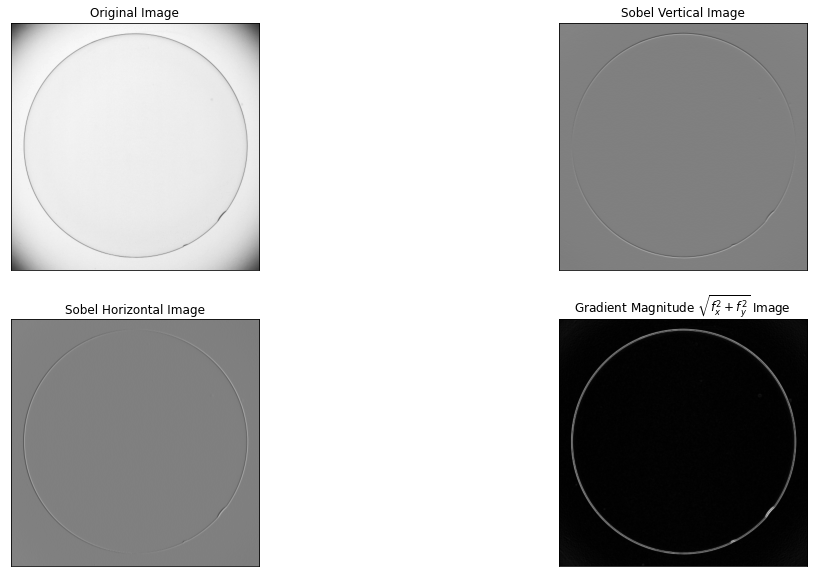

In [51]:
img2 = cv.imread(r"contact_lens.tif", cv.IMREAD_REDUCED_GRAYSCALE_2).astype('float32')
assert img2 is not None


# Vertical x axis
sobel_ver_kernal = np.array([(-1, -2, -1), (0, 0, 0), (1, 2, 1)], dtype='float32')
img2_x = cv.filter2D(img2, -1, sobel_ver_kernal)


# Horizontal y axis
sobel_hor_kernal = np.array([(-1, 0, 1), (-2, 0, 2), (-1, 0, 1)], dtype='float32')
img2_y = cv.filter2D(img2, -1, sobel_hor_kernal)

Grad_img2 = np.sqrt(img2_x**2 + img2_y**2)

fig, ax = plt.subplots(2,2, sharex='all', figsize=(18,10))
ax[0,0].imshow(img2, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Image')
ax[0,0].set_xticks([]), ax[0,0].set_yticks([])

ax[0,1].imshow(img2_x, cmap='gray', vmin=-1020, vmax=1020)
ax[0,1].set_title('Sobel Vertical Image')
ax[0,1].set_xticks([]), ax[0,1].set_yticks([])

ax[1,0].imshow(img2_y, cmap='gray', vmin=-1020, vmax=1020)
ax[1,0].set_title('Sobel Horizontal Image')
ax[1,0].set_xticks([]), ax[1,0].set_yticks([])

ax[1,1].imshow(Grad_img2, cmap='gray')
ax[1,1].set_title('Gradient Magnitude $\sqrt{f_x^2 + f_y^2}$ Image')
ax[1,1].set_xticks([]), ax[1,1].set_yticks([])
plt.show()

([], [])

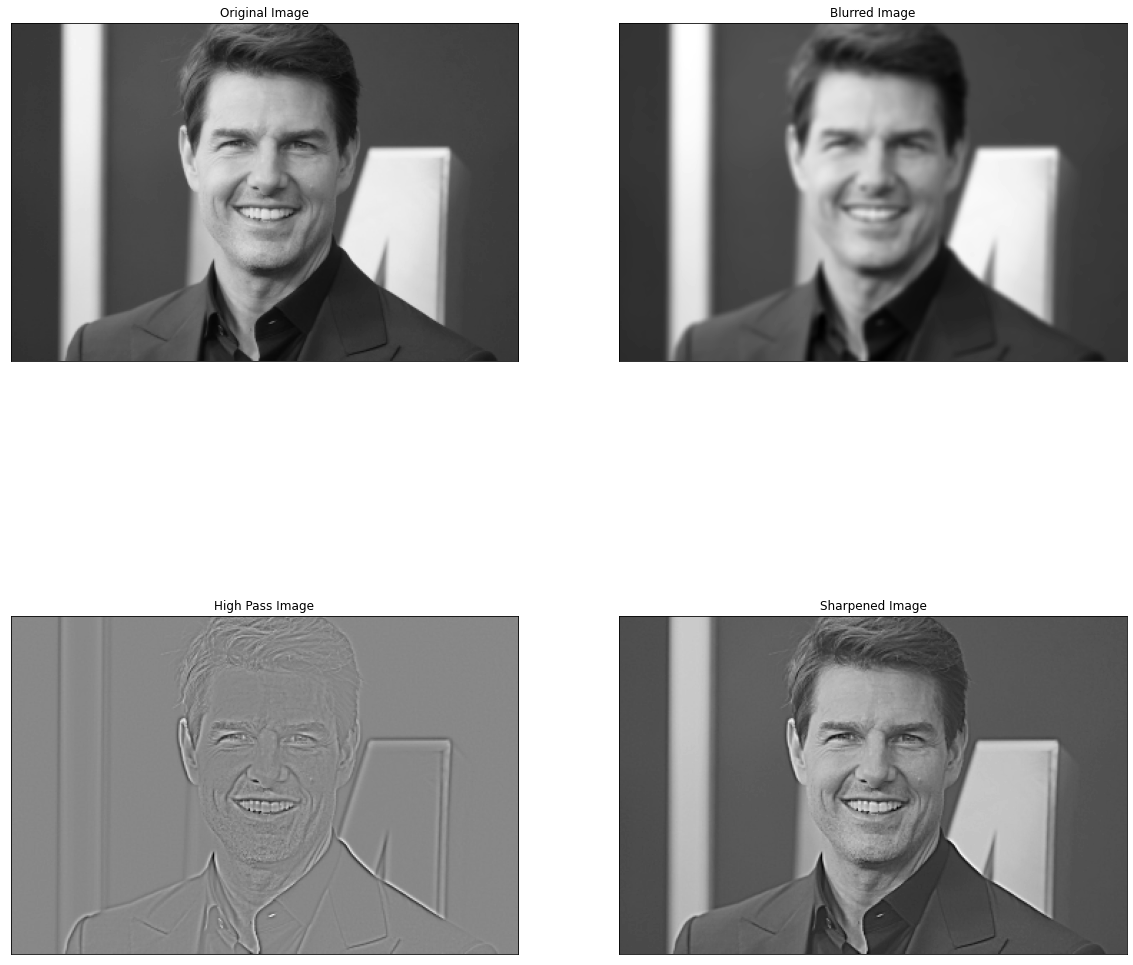

In [77]:
img3 = cv.imread(r'tom.jpg', cv.IMREAD_REDUCED_GRAYSCALE_2).astype('float32')
assert img3 is not None

sigma = 2
Gauss_Kernal_1D = cv.getGaussianKernel(5, sigma)
blurred = cv.sepFilter2D(img3, -1, Gauss_Kernal_1D, Gauss_Kernal_1D)
High_Pass = img3 - blurred
sharpened = cv.addWeighted(img3, 1.0, High_Pass, 1.5, 0)

fig, ax = plt.subplots(2,2, sharex='all', figsize=(20,20))
ax[0,0].imshow(img3, cmap='gray', vmin=0, vmax=255)
ax[0,0].set_title('Original Image')
ax[0,0].set_xticks([]), ax[0,0].set_yticks([])
ax[0,1].imshow(blurred, cmap='gray')
ax[0,1].set_title('Blurred Image')
ax[0,1].set_xticks([]), ax[0,1].set_yticks([])
ax[1,0].imshow(High_Pass, cmap='gray')
ax[1,0].set_title('High Pass Image')
ax[1,0].set_xticks([]), ax[1,0].set_yticks([])
ax[1,1].imshow(sharpened, cmap='gray')
ax[1,1].set_title('Sharpened Image')
ax[1,1].set_xticks([]), ax[1,1].set_yticks([])
